### Convolutional neural networks
In this unit, we will learn about convolutional neural networks (CNNs or ConvNets) which work particularly well with images. We will first learn about convolutional and max pooling layers and then see how to combine them into a ConvNet. In the second part of this unit, we will implement one for the MNIST data set using TensorFlow.

#### Convolutional layers
Convolutional neural networks use a particular type of layer called convolutional layer that can work on 3-dimensional volumes of data like images. The intuition behind those convolutional layers is that the important features are usually not specific to some locations of the image. For instance, if detecting lines is an important aspect of our network, we don’t need to learn to detect lines at every location of the image independently. Instead, we could simply learn a line detector that we slide over the image. This operation is called convolution.

Let’s take an example. Here is a 7x7 grid of input values with a 3x3 kernel (also called filter) that we use to detect patterns in the grid.

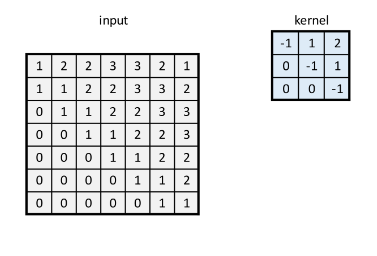

In [1]:
from IPython.display import Image
Image(filename='1.png')

The idea behind convolutional layers is to slide the kernel over the grid of input values to produce a grid of output values. In practice, we usually pad the image with zeros (called zero-padding) to align the center of the kernel and the corners of the grid.

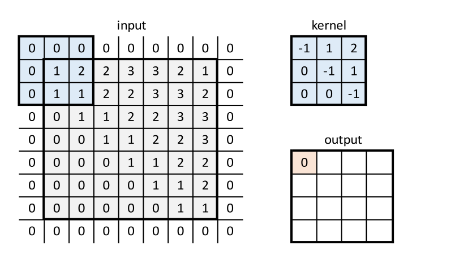

In [2]:
from IPython.display import Image
Image(filename='2.png')

To compute the output value, we simply perform an element-wise multiplication between the kernel and the grid values at the current kernel location (in blue in the image) and sum the result.

We can then slide the kernel and compute the next output value. The stride of the convolution defines how the kernel moves on the grid. For instance, if the stride is 2, we will move our kernel by two positions each time. In this example, we will slide the kernel from left to right and top to bottom, but the result doesn’t depend on the order.

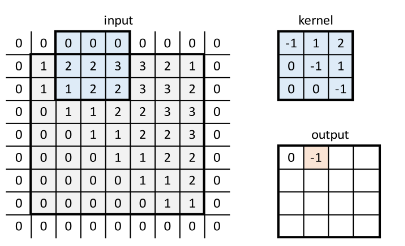

In [3]:
from IPython.display import Image
Image(filename='3.png')

In this image, the kernel moved two positions to the right, and we get a second output value. We can continue to slide the kernel in this direction to obtain two more values before it reaches the end of the line.



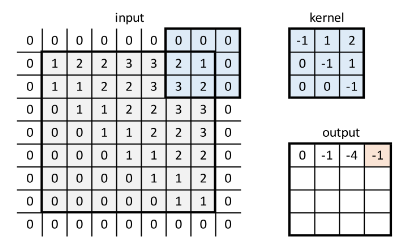

In [4]:
from IPython.display import Image
Image(filename='4.png')

We can then continue to the next line which is the third one since the stride is 2 in both directions. Note that we sometimes write the stride by specifying the horizontal and vertical components. Using this notation, we are doing a convolution with a 2x2 stride.

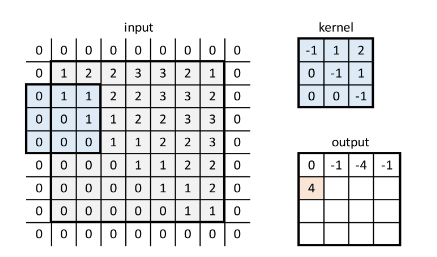

In [5]:
from IPython.display import Image
Image(filename='5.png')

In this example, the output grid is smaller than the input one since the stride is 2. However, they would have the same dimensions with this zero-padding strategy if the stride was 1. For this reason, we often call it the “same” padding strategy.

The convolution continues until the kernel reaches the bottom right corner.

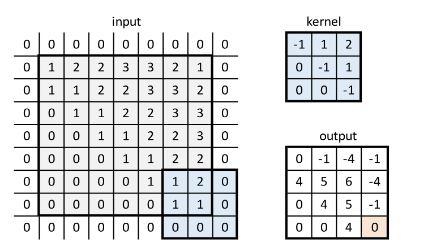

In [6]:
from IPython.display import Image
Image(filename='6.png')

In this example, the convolution reduced the 7x7 grid of input values into a 4x4 grid of outputs that we can then pass to an activation function. For instance, we can use the ReLU activation.



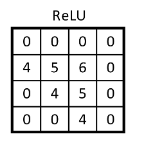

In [7]:
from IPython.display import Image
Image(filename='7.png')

Let’s summarize: Convolutional layers learn kernels/filters that process the grid of input values using the convolution operation. More specifically, it learns the values or weights in those filters that multiply the grid of input values. Note that we also assign a bias term to each kernel in practice.

#### Depth of the convolutional layer
In the example from above, our convolutional layer has a single kernel, and we get a single grid of output values. In practice, we usually have several kernels that learn to detect different patterns in the input and hence get a different grid of outputs/activations for each one. For instance, we could have a kernel that detects horizontal lines and others that detect lines with different angles. The depth of a convolutional layer refers to its number of kernels.

Note that each kernel is independent. It learns its own weights and bias parameters and hence processes the input grid differently. For instance, if we add two kernels to the convolutional layer from above, we would get an output volume of size 4x4x3, i.e., three 4x4 output grids.

At the beginning of the unit, we said that convolutional layers can work on 3-dimensional volumes of data. In the example from above, kernels are 2-dimensional grids of values because the input is also 2-dimensional. However, we can easily generalize this to 3-dimensional inputs by adding a third dimension to the kernel equal to the input depth. For instance, if we are working on RGB images - three dimensional 
(
height
,
width
,
3
)
 input volumes of data - we would need to use 
(
k
,
k
,
3
)
 kernels where 
k
 is the kernel size. In this case, we would compute element-wise multiplication between the 3d kernel and input at its current height/width location during the convolution operation. Note that we would still slide the 3d kernel over the 3d input grid in the height/width dimensions and get a 2d grid of output values for each kernel.

To summarize, convolutional layers apply a set of kernels that detect different patterns in the input volumes. In that sense, the number of kernels is an important parameter in what the layer can learn.

#### Max pooling layers
In the example from above, the convolutional layer reduces the dimensions of the grid from 7x7 to 4x4 due to the stride of 2. In practice, it’s common to keep the dimensions of the input in the convolutional layer using the “same” zero-padding strategy with a stride of 1 and pass the output to a pooling layer which performs the down-sampling operation.

The idea behind pooling layers is to slide a window over the input grid and combine the values in each window into one. One of the most common pooling operations is max pooling which computes the maximum of the values in each window. Let’s take an example. Here is an illustration of the max pooling operation applied to the output of the convolutional layer from above. Note that there are no zero-padding this time.



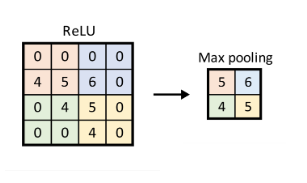

In [8]:
Image(filename='8.png')

In this image, we use a 2x2 window and stride to get four non-overlapping windows and obtain the max pooling output by taking the maximum value in each window.

Let’s summarize: Convolutional layers learn kernels that process input volumes of arbitrary depth to detect different patterns. In practice, we usually combine convolutional layers with a pooling operation to reduce the dimensions of the input. In a typical scenario, we use small kernels in the convolutional layers (usually 3x3 and sometimes 5x5) and keep the input dimensions using the “same” zero-padding with a stride of 1, and then reduce the input dimensions using a max pooling operation with 2x2 windows and stride. Here is a video of the entire process with the example from above.

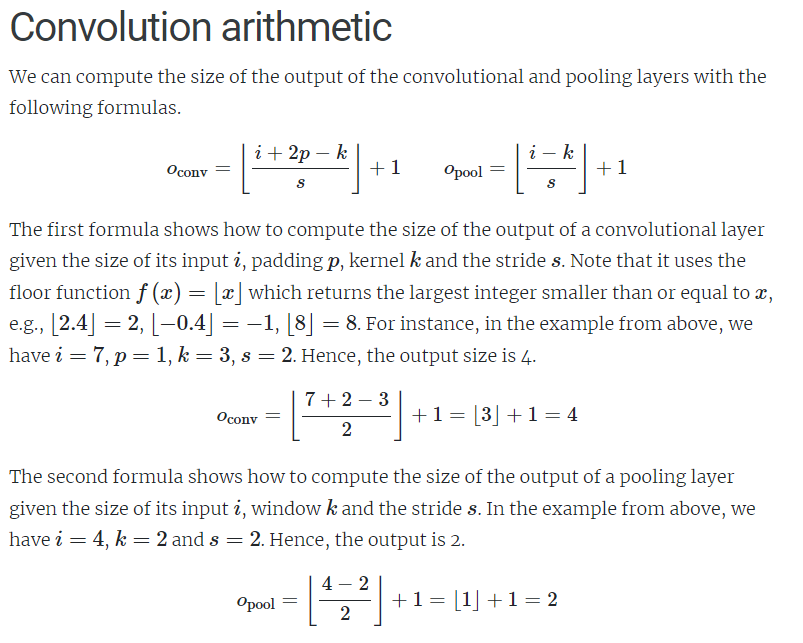

In [9]:
Image(filename='arithmetic.png')

#### Convolutional neural networks
In practice, we usually combine convolutional and max pooling layers to create convolutional neural networks. The idea is to start by detecting simple patterns in the first layers and combine them into higher-level ones with successive convolution and max pooling layers. We usually end up with a network that converts input volumes that have relatively large dimensions compared to their depth into deep output volumes with small dimensions. For instance, here is the network architecture that we will implement below to classify images from the MNIST data set.



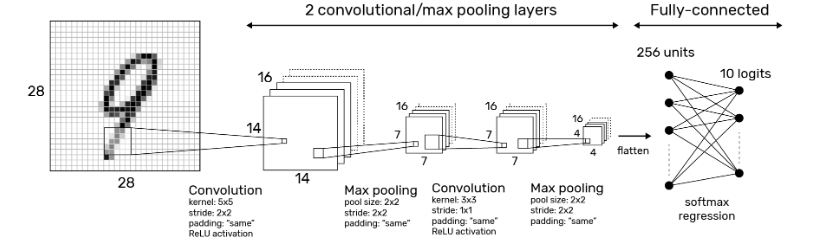

In [10]:
Image(filename='network.png')

The network has the following structure.

* Input layer with the 28x28 grayscale images from the MNIST database.
* Convolutional layer with sixteen 5x5 kernels, 2x2 stride, “same” padding and ReLU activation.
* Max pooling layer, 2x2 size and stride.
* Convolutional layer with sixteen 3x3 kernels, 1x1 stride, “same” padding and ReLU activation.
* Max pooling layer, 2x2 size and stride.
* Reshaping of the last layer to a 1-dimensional flat array.
* Fully-connected layer with 256 input units and ten output units.

In this case, we start with 28x28x1 input volumes (28x28 grayscale images) and end up with 4x4x16 (=256 values) output volumes after the second max pooling layer. This output volume should contain high-level features that we can then use in a fully-connected layer to produce the ten output digits.

ensorFlow implementation
We will now see how to implement the simple convolutional neural network from above using TensorFlow.

Data preprocessing
Let’s start by loading and preprocessing the data. We saw in the previous unit that we can improve the learning process by centering the input values around zero. In our case, we are working with pixel values that range between 0 and 255. A common way to preprocess images before passing them to a ConvNet is to subtract 128 to each value and divide them by 255. With this simple procedure, we should get centered values that range between -0.5 and 0.5.

x
rescaled
=
(x
−
128)
/255
Let’s load and preprocess the images from mnist-20k.npz. You can download the archive from the resource section.



In [11]:
import numpy as np

# Load data
with np.load("c4_mnist-20k.npz", allow_pickle=False) as npz_file:
    mnist = dict(npz_file.items())

# Convert pixels into floating point numbers
data = mnist["data"].astype(np.float32)

# Rescale pixel values between -0.5 and 0.5
data = (data - 128) / 255

In this code, we load the image pixels, convert them into floating point numbers and rescale them using the formula from above.

In this example, we will monitor the learning process using a validation set. We will use 19,500 images for training and the remaining 500 ones for evaluation. Let’s create these train and validation sets.



In [12]:
from sklearn.model_selection import train_test_split

# Split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    # Reshape images (28 by 28)
    data.reshape(-1, 28, 28, 1),  # Single channel (grayscale)
    mnist["labels"],
    test_size=500,
    random_state=0,
)

# Print shape
print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)

Train: (19500, 28, 28, 1) (19500,)
Valid: (500, 28, 28, 1) (500,)


In this code, we reshape the flat matrix of image pixels back into 28x28x1 grids of values with the reshape() function from Numpy and get two 4-dimensional arrays of values X_train and X_test with respectively 19,500 and 500 images.

Note: The last dimension, in this case representing the grayscale channel, is very important for ConvNets. It needs to be specified even if it only has a single value, as in our example.

#### Create the convolutional layer
Define the convolutional layer manually
We want to create our first convolutional layer. To achieve this, we will use the conv2d() function from the nn module. 2d because the convolution operation is done in two dimensions, regardless of the shape of the input image and kernel (whether they are 2d or 3d). We are sliding the kernel in the height/width dimensions to get a two dimensional output. The function takes the input values and a kernel variable with the kernel weights. Note that it expects 4d tensors in both cases.

* A [batch, in_height, in_width, in_channels] tensor for the input.
* A [filter_height, filter_width, in_channels, out_channels] tensor for the kernels.
We can pass the X_train from above for the input values, but we need to create the second tensor with the kernel weights.

In [13]:
import tensorflow as tf

# Define kernel matrix
kernel = tf.Variable(
    initial_value=tf.random.truncated_normal(
        shape=(5, 5, 1, 16),  # Sixteen 5x5x1 kernels
        stddev=0.01,  # Small standard deviation
        seed=0,
    )
)

In this code, we have created a Variable with the weights for the sixteen kernels and initialize it using a (truncated) normal distribution with a small standard deviation. Note that we have to specify the depth of the input values even if the images are 2-dimensional. For this reason, the shape of the kernels is 5x5x1 instead of 5x5, and the input images are 28x28x1 instead of 28x28.

We can now create the convolution operation with the conv2d() function. We can specify the stride and the padding with the stride and padding arguments. For the stride, we need to provide a list with one value for each dimension in the input, i.e., how the kernels move on the [batch, in_height, in_width, in_channels] input tensor. In our case, we set it to [1, 2, 2, 1] since we are doing a 2d convolution over the height/width axes.

In [14]:
# Convolutional layer
conv = tf.nn.conv2d(
    X_train, kernel, strides=[1, 2, 2, 1], padding="SAME"  # Stride: 2  # "same" padding
)
print(conv.shape)

(19500, 14, 14, 16)


The function creates a conv operation that produces sixteen 14x14 grids of values for each image. We can then add a variable with the biases and apply the activation function.



In [15]:
# Create biases (one per filter)
biases = tf.Variable(initial_value=tf.zeros(shape=[16]))

# Apply activation function
conv = tf.nn.relu(conv + biases)  # ReLU

Note that we create one bias for each kernel and add them to the output values using the + operator. TensorFlow will automatically add each bias to the relevant filter using broadcasting.

Creating convolutional layers using the code from above can quickly become complex. In particular with deep networks with several layers. For this reason, TensorFlow provides a simplified Conv2D() class in its kera.layers module that automatically creates all the variables and apply the relevant activation function. Let’s redefine our network with this class.

#### Define convolutional layer using built-in class

In [16]:
# Convolutional layer
conv_layer = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding="SAME",
    activation=tf.nn.relu,
    kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.01, seed=0),
    name="conv",  # Add name
)
conv_output = conv_layer(X_train)

print(conv_output.shape)

(19500, 14, 14, 16)


In [17]:
print(conv_layer.kernel.shape)
print(conv_layer.bias.shape)

(5, 5, 1, 16)
(16,)


This time, we pass the input variable, the number of filters, the stride and padding, the activation function and an initializer for the kernel weights. It’s interesting to note that we don’t have to repeat any values. This makes the network architecture much easier to edit, e.g., change the number of kernels or their size. One can extract the weights of all the sixteen kernels using the kernel class attribute and the biases using bias.

#### Max pooling layer
The keras.layers module also provides a MaxPool2D class to create max pooling layers. The layer takes the 4d input tensor, the pool size, the stride, and padding.

In [18]:
# Max pooling layer
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="SAME")
pool_output = pool_layer(conv_output)

print(pool_output.shape)

(19500, 7, 7, 16)


As we can see, the max pooling layer reduced by half the dimensions of the input in the height/width axes and hence by 75% the number of values.

#### Convolutional neural network
Let’s add the second convolutional and max pooling layers on top of the first ones with the Conv2D() and MaxPool2D classes.



In [19]:
# 2nd convolutional layer
conv_layer2 = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="SAME",
    activation=tf.nn.relu,
    kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.01, seed=0),
    name="conv2",
)
conv_output2 = conv_layer2(pool_output)

# 2nd max pooling layer
pool_output2 = pool_layer(conv_output2)

print(conv_output2.shape)
print(pool_output2.shape)

(19500, 7, 7, 16)
(19500, 4, 4, 16)


This time, the convolutional layer doesn’t modify the dimension of the input since it uses the “same” padding strategy with a stride of 1. On the other hand, the max pooling layer reduces its dimensions, and we get sixteen 4x4 grids (256 output values). In a typical ConvNet architecture, we use these high-level features to solve our task. In our example, we will combine these values into ten output logits with a fully-connected layer.

But first, we need to flatten the 4x4x16 output volumes into flat vectors. To achieve this we can use the reshape() function from TensorFlow.



In [20]:
# Flatten output into a (batch_size, 256) matrix
flat_output = tf.reshape(pool_output2, [-1, 256])

print(flat_output.shape)


(19500, 256)


In this code, we pass the desired output shape to the function. This can be an issue in practice since it depends on the current ConvNet architecture. In particular, we would need to recompute and edit the number of features each time we modify the first convolutional and max pooling layers, e.g., increase the number of kernels, change their size and so on.

To avoid this, we can use the Flatten class from the keras.layers module which automatically computes the shape of the input and flattens the dimensions (except the first one which is the batch size).



In [22]:
# Flatten output
flat_layer = tf.keras.layers.Flatten()
flat_output = flat_layer(pool_output2)

print(flat_output.shape)

(19500, 256)


Now that we have a set of 256 features for each image, let’s build the final classifier using a fully-connected layer.

In [23]:
# Output layer
logits_layer = tf.keras.layers.Dense(
    units=10,
    activation=None,  # No activation function
    kernel_initializer=tf.keras.initializers.VarianceScaling(scale=1, seed=0),
    bias_initializer=tf.zeros_initializer(),
    name="dense",
)
logits_output = logits_layer(flat_output)

print(logits_output.shape)

(19500, 10)


#### Loss function and training operations
Finally, let’s define the loss function and the training operations. This time, we will use the Adam optimizer. Adam is a very popular algorithm that was introduced in 2015. It’s now one of the default choices to optimize neural networks. We won’t go into the details of how the algorithm works, but one of the key differences with stochastic gradient descent (SGD) is that it maintains a different learning rate for each parameter in the network.

Adam optimizer has several parameters, but we will only adjust the principal learning rate. We will use the default learning rate of 0.001 from the documentation.

In [25]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define functions used to train the graph

# Compute the logits
@tf.function
def compute_logits(x):
    conv_output = conv_layer(x)
    pool_output = pool_layer(conv_output)
    conv_output2 = conv_layer2(pool_output)
    pool_output2 = pool_layer(conv_output2)
    flat_output = flat_layer(pool_output2)
    logits_output = logits_layer(flat_output)
    return logits_output


# Compute the loss
@tf.function
def compute_loss(y, logits):
    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    mean_ce = tf.reduce_mean(ce)
    return mean_ce


# Compute the accuracy
@tf.function
def compute_accuracy(y, logits):
    predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
    is_correct = tf.equal(y, predictions)
    acc = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))
    return acc


# Train the model (optimization procedure)
@tf.function
def train(x, y):
    with tf.GradientTape() as tape:
        logits = compute_logits(x)
        loss = compute_loss(y, logits)
    # Concatenate the trainable variables in one list using the '+' operation on lists
    variables = (
        conv_layer.trainable_variables
        + conv_layer2.trainable_variables
        + logits_layer.trainable_variables
    )
    optimizer.minimize(loss=loss, var_list=variables, tape=tape)
    return logits, loss

The main difference from the previous unit is in the compute_logits() function where we are now using the layers created above to build our convolutional neural network.

#### Train network
Let’s train our network. We will use the random batch generator from the previous unit.

In [26]:
# Batch generator
def get_batches(X, y, batch_size):
    # Shuffle X,y
    shuffled_idx = np.arange(len(y))  # 1,2,...,n
    np.random.shuffle(shuffled_idx)

    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, .. where b is the batch size
    for i in range(0, len(y), batch_size):
        # Batch indexes
        batch_idx = shuffled_idx[i : i + batch_size]
        yield X[batch_idx], y[batch_idx]

We can now train our network for ten epochs using small batches of data.

In [28]:
# Validation accuracy
valid_acc_values = []

# Set seed
np.random.seed(0)

# Train several epochs
for epoch in range(10):
    # Accuracy values (train) after each batch
    batch_acc = []

    # Get batches of data
    for X_batch, y_batch in get_batches(X_train, y_train, 64):
        # Run training
        batch_logits, _ = train(X_batch, y_batch)

        # Evaluate training accuracy (on current batch)
        acc = compute_accuracy(y_batch, batch_logits)
        batch_acc.append(acc)

    # Evaluate validation accuracy (on the whole data)
    valid_logits = compute_logits(X_valid)
    valid_acc = compute_accuracy(y_valid, valid_logits)
    valid_acc_values.append(valid_acc)

    # Print progress
    print(
        "Epoch {} - valid: {:.3f} train: {:.3f} (mean)".format(
            epoch + 1, valid_acc, np.mean(batch_acc)
        )
    )

# Get 1st conv. layer kernels
kernels = conv_layer.kernel

Epoch 1 - valid: 0.922 train: 0.752 (mean)
Epoch 2 - valid: 0.956 train: 0.937 (mean)
Epoch 3 - valid: 0.962 train: 0.952 (mean)
Epoch 4 - valid: 0.968 train: 0.960 (mean)
Epoch 5 - valid: 0.972 train: 0.967 (mean)
Epoch 6 - valid: 0.970 train: 0.970 (mean)
Epoch 7 - valid: 0.976 train: 0.974 (mean)
Epoch 8 - valid: 0.976 train: 0.975 (mean)
Epoch 9 - valid: 0.974 train: 0.976 (mean)
Epoch 10 - valid: 0.982 train: 0.980 (mean)


In this code, we run the training operation and save the accuracy on each batch of data. After each epoch, we evaluate the network on the validation set and compare its validation accuracy to the mean of the train accuracy values. In our case, the train and validation accuracy values are close to each other which is a good sign that the network is not overfitting. At the end of the training process, we save the weights of the kernels from the first convolutional layer in a kernels variable to visualize them.

But first, let’s plot the validation accuracy values.



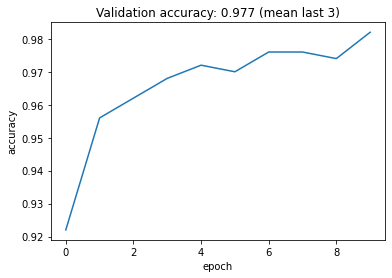

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(valid_acc_values)
plt.title(
    "Validation accuracy: {:.3f} (mean last 3)".format(
        np.mean(valid_acc_values[-3:])  # Last three values
    )
)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

We get a final validation accuracy around 98%.

#### Plot filters
Let’s visualize the 16 kernels from the first layer. To achieve this, we need to extract the 5x5 kernel weights from the kernels variable which is an array of shape (5, 5, 1, 16).



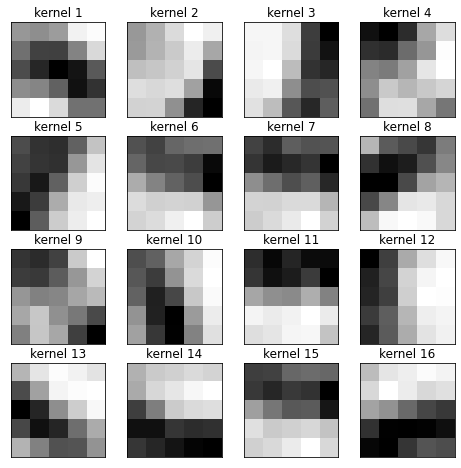

In [30]:
# Create figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

# Plot the 16 kernels from the first convolutional layer
for i, axis in enumerate(axes.flatten()):
    # Get i-th kernel
    kernel = kernels[:, :, :, i].numpy()

    # Kernels are 5x5x1 (height, width, channels)
    # Remove last dimension
    kernel = kernel[:, :, 0]  # (5, 5) kernel

    # Plot kernel with imshow()
    axis.set_title("kernel {}".format(i + 1))
    axis.imshow(kernel, cmap=plt.cm.gray_r)
    axis.get_xaxis().set_visible(False)  # disable x-axis
    axis.get_yaxis().set_visible(False)  # disable y-axis

plt.show()

In this code, we create a 4x4 grid of subplots with the subplots() function from Pyplot which returns a 4x4 axes array with the subplot axes. We use the flatten() function to convert this 2-dimensional array into a 1-dimensional one with the 16 axes and then iterate through this array of axes with the Python enumerate() function which returns each axis and its index in the flat array, i.e., integers between 0 and 15. We use this index to extract the weights from the i-th kernel and plot them with the imshow() function.

#### Exercise
To see the effect of each kernel on the images, you can pick one from the validation set and plot the corresponding convolutional output conv. You should get a set of sixteen 14x14 output grids (also called activation or feature maps). This time, it’s your turn to write the code!

#### Summary
In this unit, we learned about convolutional neural networks and saw how to implement them in TensorFlow using the nn and keras.layers modules. If you want to learn more about ConvNets, we highly recommend you to watch this presentation from Andrej Karpathy.

In the next exercise, you will build a ConvNet for the CIFAR-10 data set. This is a good opportunity to experiment with different architectures and parameters, e.g., the number of kernels, their sizes, the stride, the number of convolutional layers and so on.